In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option("display.max_columns",None)

##### Let's start with loading the data file

In [101]:
data = pd.read_csv("Breast_cancer_data.csv")

In [102]:
data.head(20)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


#### Let us have a visualizing analysis of null values if any

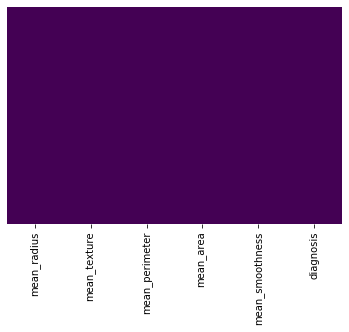

In [104]:
sns.heatmap(data.isnull(),cmap="viridis",cbar=False,yticklabels=False)

##### We observe that there are no null valuse present

#### Our target variable is diagnosis
 #####  Lets have a look at the diagramatic relation of our target variable with other independent variables

In [105]:
data.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

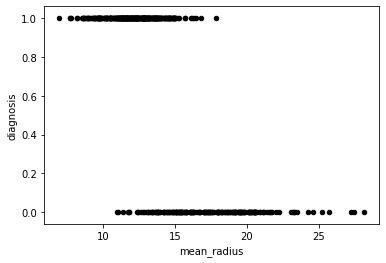

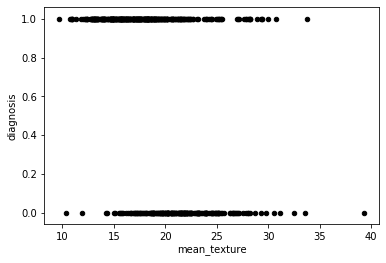

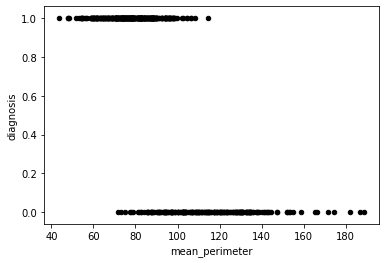

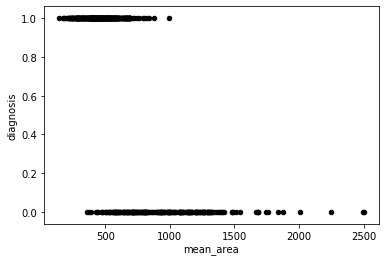

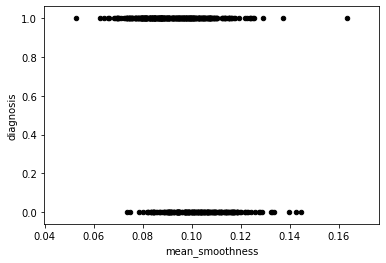

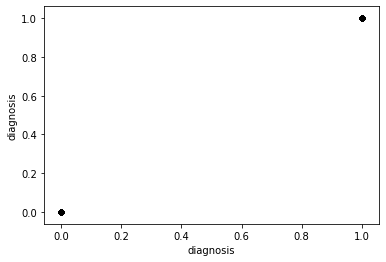

In [106]:
for feature in data.columns:
    data.plot.scatter(x=feature,y="diagnosis",c='black')

##### We happen to see some relation of the indepenent variables with the target  variable but its not clear. Lets explore more with other plots 

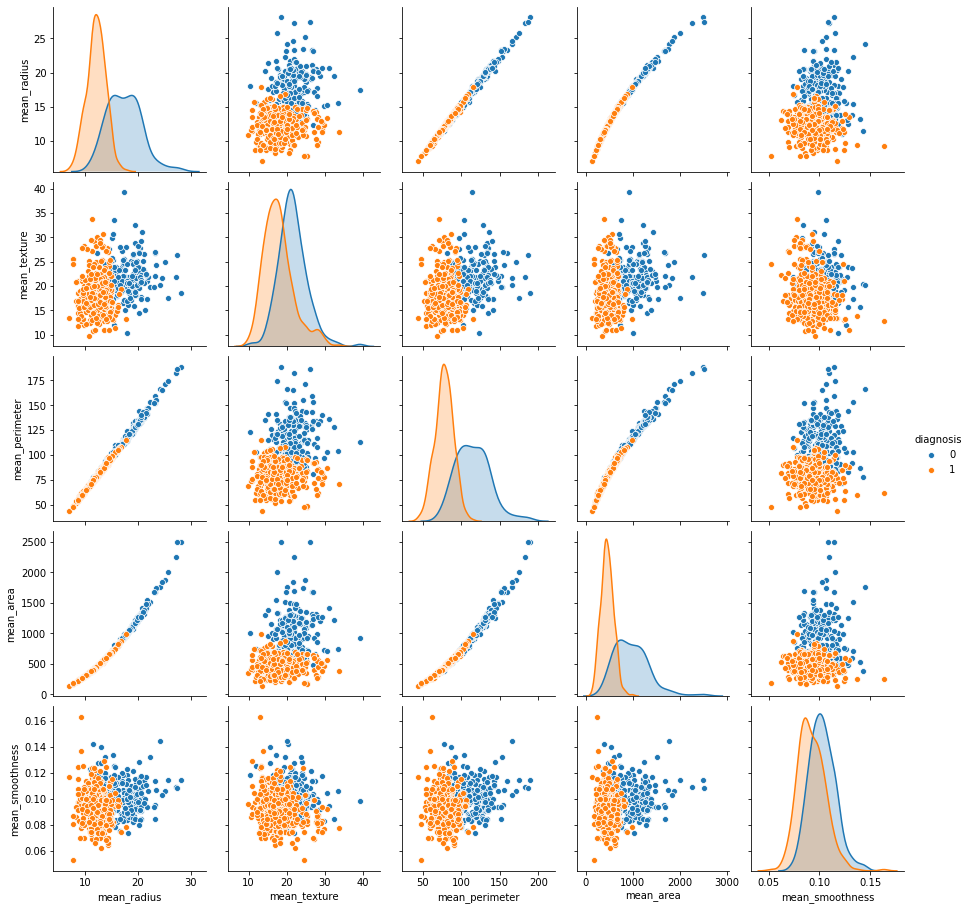

In [107]:
sns.pairplot(data,hue="diagnosis")

In [108]:
data.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


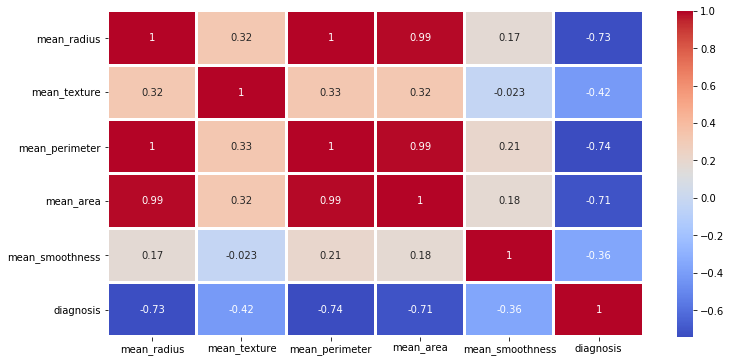

In [109]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),cmap="coolwarm",annot=True,linecolor="white",lw=2)

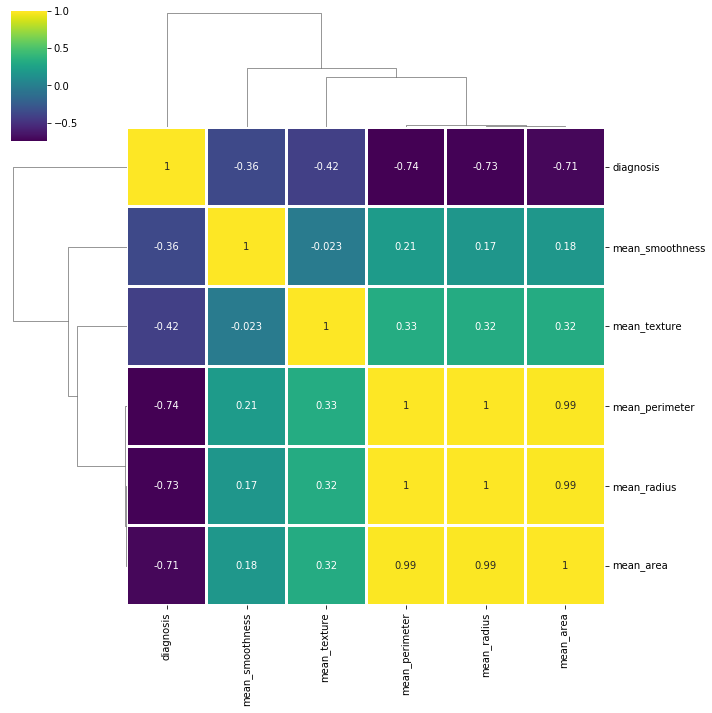

In [110]:
sns.clustermap(data.corr(),cmap="viridis",annot=True,linecolor="white",lw=2)

#### From Heatmap and Clustermap we observe that there is negative correlation of Target variable with Mean radius,Mean perimeter and Mean area.

So our classification model will focus on input from the above parameters

In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
scaler = StandardScaler()

In [113]:
scaler.fit(data.drop("diagnosis",axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [114]:
scaled_feature = scaler.transform(data.drop("diagnosis",axis=1))
scaled_feature

array([[ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633],
       [ 1.82982061, -0.35363241,  1.68595471,  1.90870825, -0.82696245],
       [ 1.57988811,  0.45618695,  1.56650313,  1.55888363,  0.94221044],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578,  0.57795264, -0.84048388],
       [ 1.83834103,  2.33645719,  1.98252415,  1.73521799,  1.52576706],
       [-1.80840125,  1.22179204, -1.81438851, -1.34778924, -3.11208479]])

In [115]:
data_feat = pd.DataFrame(scaled_feature,columns=data.columns[:-1])

In [116]:
data_feat

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,1.097064,-2.073335,1.269934,0.984375,1.568466
1,1.829821,-0.353632,1.685955,1.908708,-0.826962
2,1.579888,0.456187,1.566503,1.558884,0.942210
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553
4,1.750297,-1.151816,1.776573,1.826229,0.280372
...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842
565,1.704854,2.085134,1.615931,1.723842,0.102458
566,0.702284,2.045574,0.672676,0.577953,-0.840484
567,1.838341,2.336457,1.982524,1.735218,1.525767


In [117]:
X=data_feat[["mean_perimeter","mean_radius","mean_area"]]
y=data["diagnosis"]

In [118]:
from sklearn.metrics import classification_report,confusion_matrix

#### Logistic Regression

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=101)

In [122]:
logmodel = LogisticRegression()

In [123]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
pred = logmodel.predict(X_test)

In [125]:
print(classification_report(y_test,pred))
print("\n")
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82        71
           1       0.88      0.92      0.90       117

    accuracy                           0.87       188
   macro avg       0.87      0.86      0.86       188
weighted avg       0.87      0.87      0.87       188



[[ 56  15]
 [  9 108]]


#### KNN 

In [126]:
from sklearn.neighbors import KNeighborsClassifier

In [127]:
## The following code will help us get the best value for K

In [128]:
error_rate=[]

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Error rate')

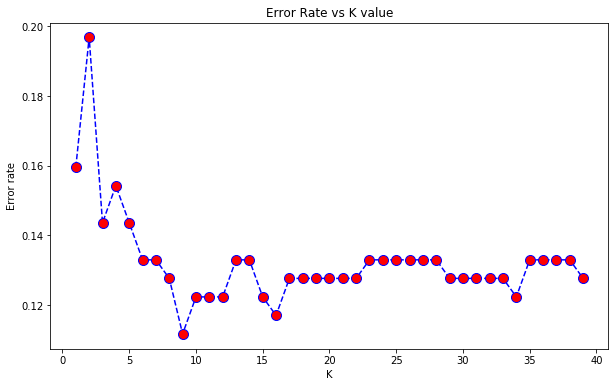

In [129]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color="blue",ls="--",marker="o",markerfacecolor="red",markersize=10)
plt.title("Error Rate vs K value")
plt.xlabel("K")
plt.ylabel("Error rate")

In [130]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))

[[ 54  17]
 [  4 113]]


              precision    recall  f1-score   support

           0       0.93      0.76      0.84        71
           1       0.87      0.97      0.91       117

    accuracy                           0.89       188
   macro avg       0.90      0.86      0.88       188
weighted avg       0.89      0.89      0.89       188



#### RandomForestClassification

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
rfc = RandomForestClassifier(n_estimators=100)

In [133]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [134]:
rfc_pred = rfc.predict(X_test)

In [135]:
print(confusion_matrix(y_test,rfc_pred))
print("\n")
print(classification_report(y_test,rfc_pred))

[[ 54  17]
 [  7 110]]


              precision    recall  f1-score   support

           0       0.89      0.76      0.82        71
           1       0.87      0.94      0.90       117

    accuracy                           0.87       188
   macro avg       0.88      0.85      0.86       188
weighted avg       0.87      0.87      0.87       188



##### From the above model we see that KNN has better accuracy of all

#### Cross Validation

In [136]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [137]:
accuracy=[]
skf = StratifiedKFold(n_splits = 10,random_state = None)

In [138]:
skf.get_n_splits(X,y)
for train_index,test_index in skf.split(X,y):
    print("Train:",train_index,"validation:",test_index)
    
    X1_train,X1_test = X.iloc[train_index],X.iloc[test_index]
    y1_train,y1_test = y.iloc[train_index],y.iloc[test_index]
    
    knn.fit(X1_train,y1_train)
    pred = knn.predict(X1_test)
    score = accuracy_score(pred,y1_test)
    accuracy.append(score)
    
print(accuracy)

Train: [ 25  26  27  28  29  30  31  32  33  34  35  36  38  39  40  41  42  43
  44  45  47  53  54  56  57  62  64  65  70  72  73  75  77  78  82  83
  85  86  87  91  94  95  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236
 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254
 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272
 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290
 291 292 293 294 295 296 297 298 299 300 301

In [139]:
acc = np.array(accuracy)
acc.mean()

0.8928258145363408

In [140]:
print("Average accuracy of the model is:",np.round(acc.mean()*100,2))

Average accuracy of the model is: 89.28


In [141]:
print("Maximum accuracy of the model is :",np.round(acc.max()*100,2))

Maximum accuracy of the model is : 96.49


In [142]:
print("minimum accuracy of the model is :",np.round(acc.min()*100,2))

minimum accuracy of the model is : 80.7
